In [17]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [18]:
#import data and create data frame
df = pd.read_csv("Supermarket_Customers_data_v2.csv", delimiter=';')

df.rename(columns = {'Spending Score (1-100): Score assigned by the shop based on customer behavior and spending nature':'Spending Score (1-100)'}, inplace = True)
df["Sex"]=np.where(df["Sex"]=="Male",0,1)

# Descriptive Statistics

In [19]:
df.describe()

,Customer_ID,Sex,Age,Annual Income (k$),Spending Score (1-100)
count,1082.0000,1082.000000,1082.000000,1082.000000,1082.000000
mean,541.5000,0.510166,43.264325,57.737523,44.459335
std,312.4908,0.500128,17.728302,30.490463,25.961380
min,1.0000,0.000000,16.000000,15.000000,4.000000
25%,271.2500,0.000000,30.000000,32.000000,22.000000
50%,541.5000,1.000000,40.000000,54.000000,42.000000
75%,811.7500,1.000000,56.000000,78.000000,63.000000
max,1082.0000,1.000000,87.000000,148.000000,100.000000


<IPython.core.display.Javascript object>


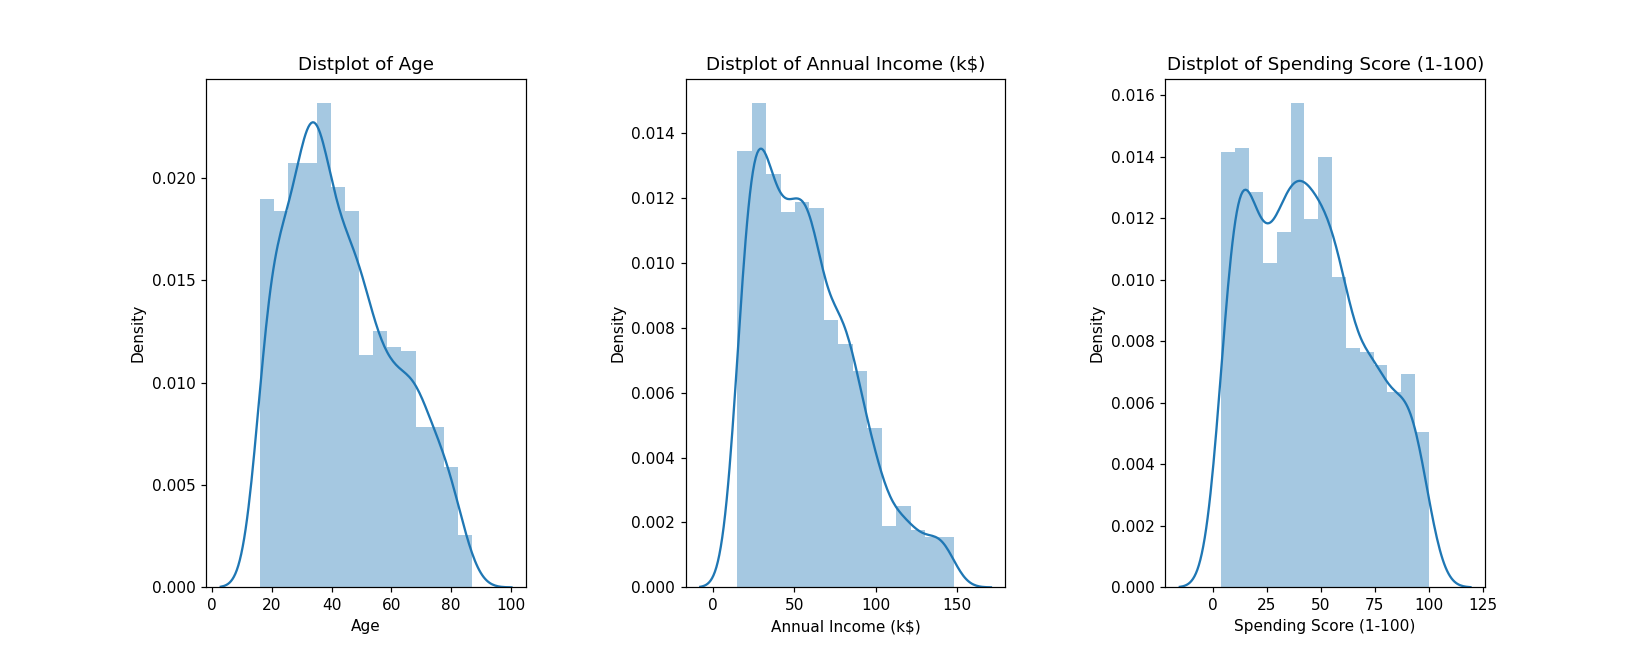

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



In [20]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

# Clustering of Spending Score and Annual Income

<IPython.core.display.Javascript object>


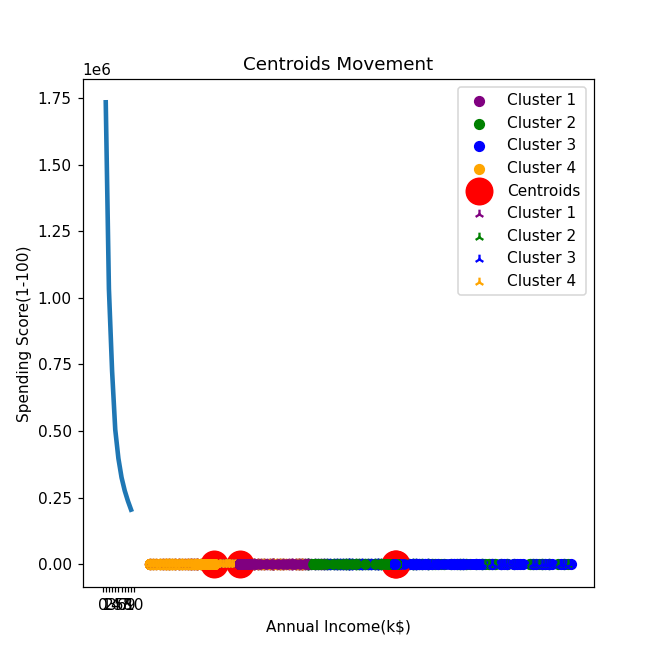

In [21]:
#Elbow method for identifying the optimal k for the algorithm
X = df.iloc[:,[3,4]].values
WCSS = []
for i in range(1,10):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(X)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (6,6))
plt.plot(range(1,10),WCSS, linewidth=3)
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [22]:
#Clusters plotted: Annual Income against Spending Score
X = df.iloc[:, [3,4]].values
X[0:4]

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10, random_state=0 )
kmeans.n_clusters
y_kmeans = kmeans.fit_predict(X)
type(y_kmeans)


df['cluster'] = y_kmeans

In [23]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=40, c='purple', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=40, c='green', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=40, c='blue', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=40, c='orange', label ='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()


## Centroids Spielerei

In [24]:
from sklearn.cluster import KMeans
from sklearn import datasets
import numpy as np

#iris = datasets.load_iris()
#X = iris.data[:, :2]


#Clusters plotted: Annual Income against Spending Score
X = df.iloc[:, [3,4]].values
X[0:4]


iterations = 300
centroids = None
arr = []
for i in range(iterations):
    kmeans = KMeans(
        max_iter=1,
        n_init=1,
        init=(centroids if centroids is not None else 'k-means++'),
        n_clusters=4,
        random_state=0)
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_
    arr.append(centroids)

    #print(f'iter: {i} - first: {centroids[0]}, second: {centroids[1]}, third: {centroids[2]}, forth: {centroids[3]} ')

In [25]:
import matplotlib.pyplot as plt


colors = ['purple', 'green', 'orange', 'blue']
arr1x=[]
arr1y=[]

print(arr1x)
for i in range(len(arr)):
    #arr1x.append(arr[i][1][0])
    #arr1y.append(arr[i][1][1])
    for k in range(len(arr[0])): 
        plt.scatter(arr[i][k][0], arr[i][k][1], zorder=10, c=colors[k])
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=40, marker="2", c='purple', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=40, marker="2", c='green', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=40, marker="2", c='blue', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=40, marker="2", c='orange', label ='Cluster 4')
plt.title('Centroids Movement')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()



[]


<IPython.core.display.Javascript object>


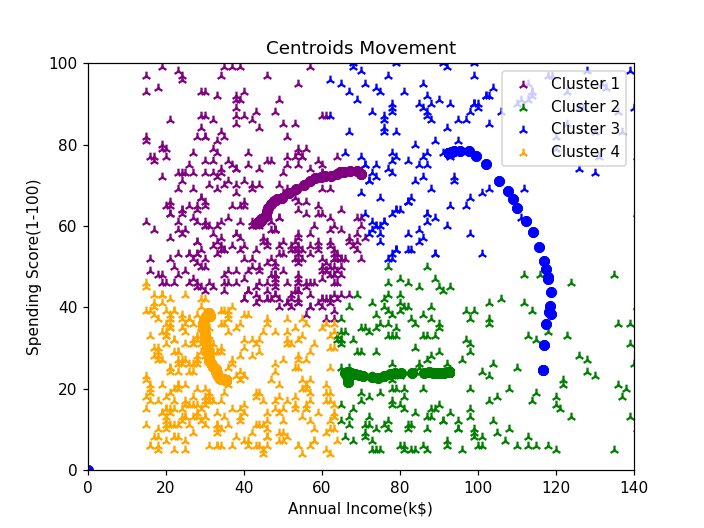

[70.15116279069768, 69.03536977491963, 67.16498316498317]


In [67]:
%matplotlib notebook
%matplotlib notebook
import matplotlib.animation as animation

colors = ['purple', 'green', 'orange', 'blue']
arr1x=[]
arr1y=[]
arr2x=[]
arr2y=[]
arr3x=[]
arr3y=[]
arr4x=[]
arr4y=[]


for i in range(len(arr)):
    arr1x.append(arr[i][0][0])
    arr1y.append(arr[i][0][1])
    arr2x.append(arr[i][1][0])
    arr2y.append(arr[i][1][1])
    arr3x.append(arr[i][2][0])
    arr3y.append(arr[i][2][1])
    arr4x.append(arr[i][3][0])
    arr4y.append(arr[i][3][1])
    #for k in range(len(arr[0])): 
        #plt.scatter(arr[i][k][0], arr[i][k][1], zorder=10, c=colors[k])
    
fig, ax = plt.subplots()
ax.set_xlim([0, 140])
ax.set_ylim([0, 100])

scat1 = ax.scatter(0, 0, c=colors[0])
scat2 = ax.scatter(0, 0, c=colors[1])
scat3 = ax.scatter(0, 0, c=colors[2])
scat4 = ax.scatter(0, 0, c=colors[3])

print(arr1x[:3])

def animate(i):
    scat1 = ax.scatter(arr1x[i], arr1y[i], c=colors[0])
    scat2 = ax.scatter(arr2x[i], arr2y[i], c=colors[1])
    scat3 = ax.scatter(arr3x[i], arr3y[i], c=colors[2])
    scat4 = ax.scatter(arr4x[i], arr4y[i], c=colors[3])
    return scat1, scat2, scat3, scat4

ani = animation.FuncAnimation(fig, animate, repeat=True,
                                    frames=70, interval=50, repeat_delay=3000)

plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=40, marker="2", c='purple', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=40, marker="2", c='green', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=40, marker="2", c='blue', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=40, marker="2", c='orange', label ='Cluster 4')
plt.title('Centroids Movement')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()

#To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps=5,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
ani.save('scatter.gif', writer=writer)

plt.show()

<IPython.core.display.Javascript object>


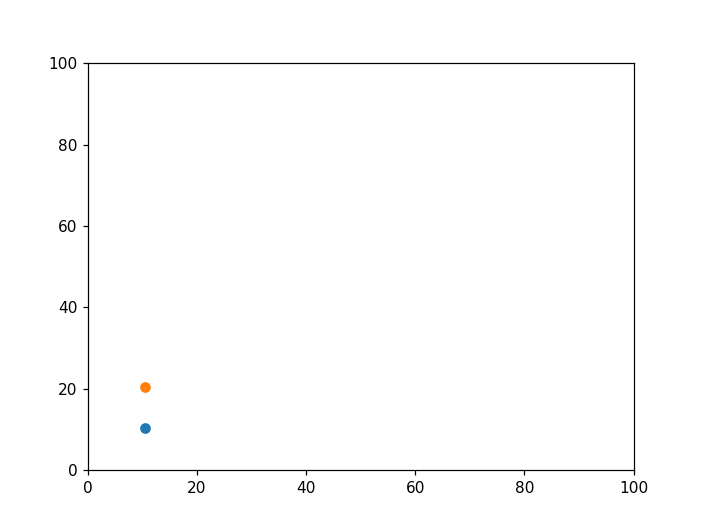

In [37]:
array = np.linspace(0, 100, 1000)

fig, ax = plt.subplots()
ax.set_xlim([0, 100])
ax.set_ylim([0, 100])

scat1 = ax.scatter(1, 0)
scat2 = ax.scatter(1, 0)

def animate(i):
    scat1.set_offsets((array[i], array[i]))
    scat2.set_offsets((array[i], array[i]+10))
    return scat1, scat2

ani = animation.FuncAnimation(fig, animate, repeat=True,
                                    frames=len(array) - 1, interval=5)

plt.show()

# Clustering of Spending Score and Age

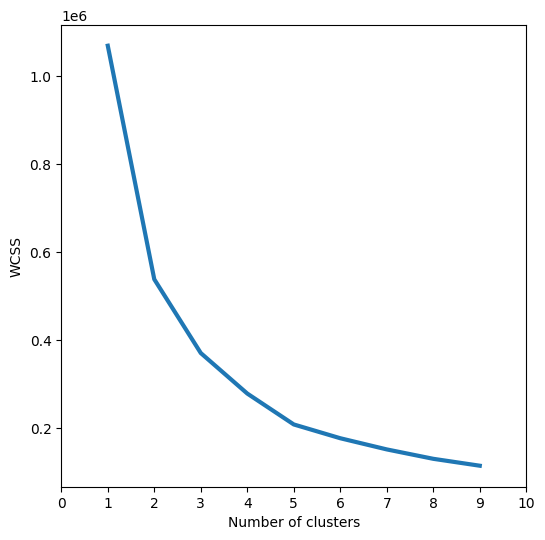

In [ ]:
X = df.iloc[:,[2,4]].values
WCSS = []
for i in range(1,10):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(X)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (6,6))
plt.plot(range(1,10),WCSS, linewidth=3)
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
#Clusters plotted: Age against Spending Score
X = df.iloc[:, [2,4]].values
X[0:4]

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10, random_state=0 )
kmeans.n_clusters
y_kmeans = kmeans.fit_predict(X)
type(y_kmeans)


df['cluster'] = y_kmeans
#print(y_kmeans.shape)
#print(y_kmeans.dtype)

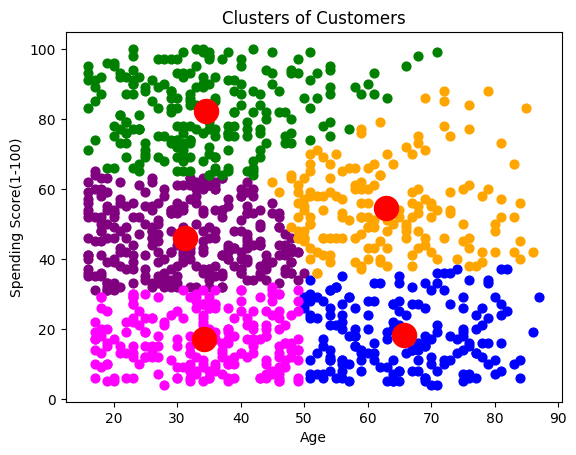

In [ ]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=40, c='purple', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=40, c='green', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=40, c='blue', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=40, c='orange', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=40, c='magenta', label ='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.show()


# Clustering of Annual Income and Age

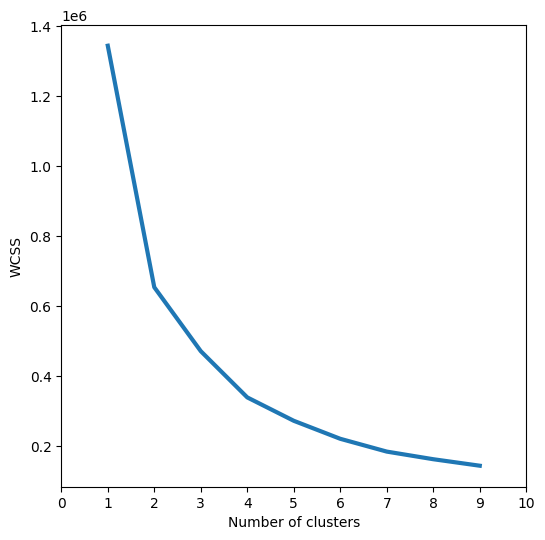

In [ ]:
X = df.iloc[:,[2,3]].values
WCSS = []
for i in range(1,10):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(X)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (6,6))
plt.plot(range(1,10),WCSS, linewidth=3)
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
#Clusters plotted: Age against Annual Income
X = df.iloc[:, [2,3]].values
X[0:4]

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10, random_state=0 )
kmeans.n_clusters
y_kmeans = kmeans.fit_predict(X)
type(y_kmeans)


df['cluster'] = y_kmeans
df.head()
print(y_kmeans.shape)
print(y_kmeans.dtype)

(1082,)
int32


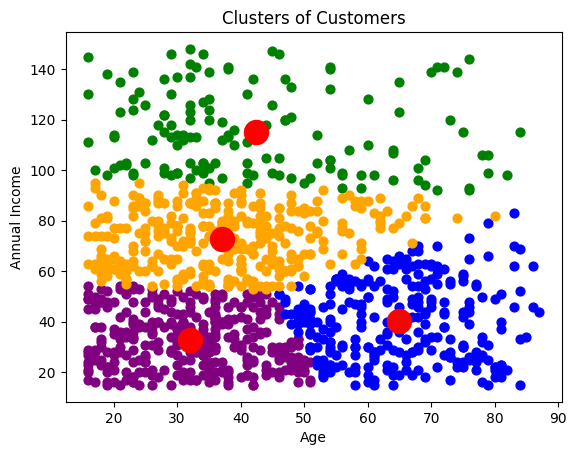

In [ ]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=40, c='purple', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=40, c='green', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=40, c='blue', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=40, c='orange', label ='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

# Clustering of all three Variables (Age, Annual Income, and Spending Score)

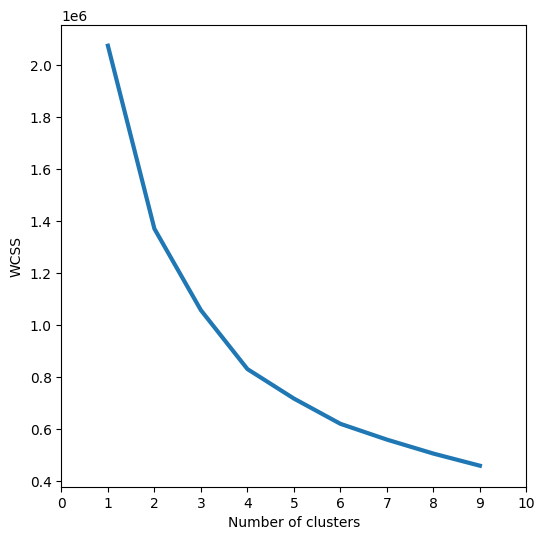

In [ ]:
x = df[['Age','Annual Income (k$)','Spending Score (1-100)']].values
WCSS = []
for i in range(1,10):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (6,6))
plt.plot(range(1,10),WCSS, linewidth=3)
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

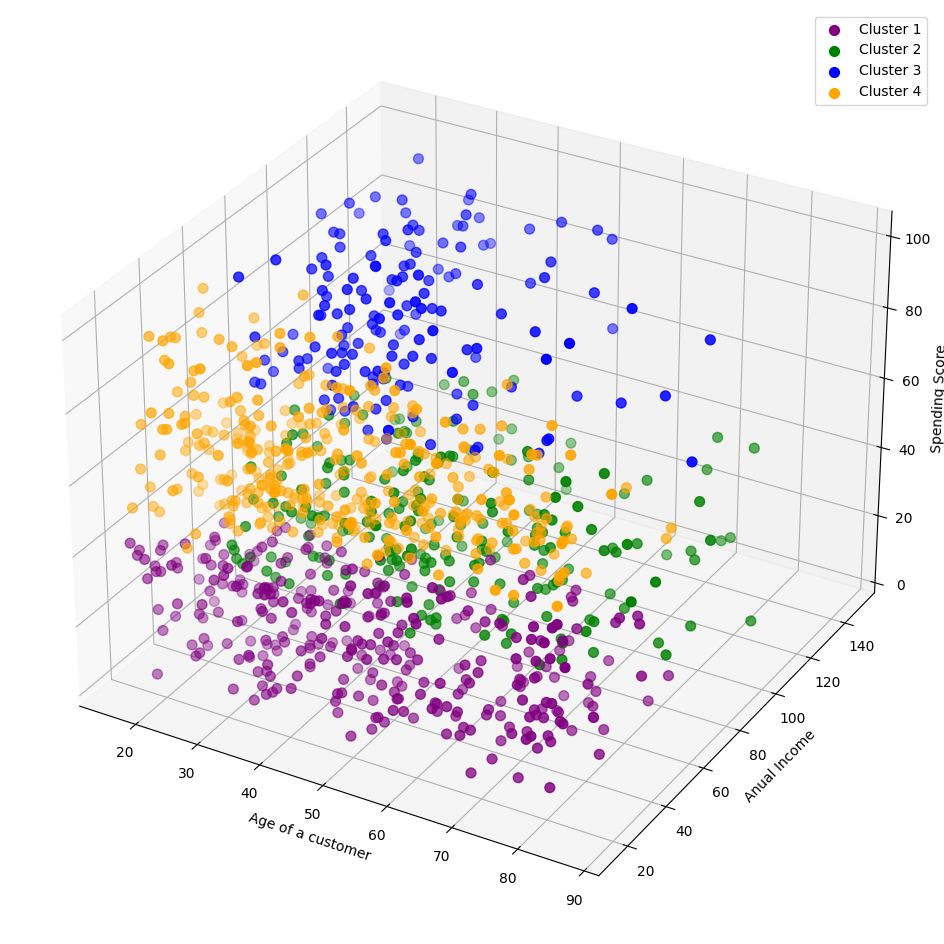

In [ ]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 50 , color = 'purple', label = "Cluster 1")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 50 , color = 'green', label = "Cluster 2")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 50 , color = 'blue', label = "Cluster 3")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 50 , color = 'orange', label = "Cluster 4")
ax.set_xlabel('Age of a customer')
ax.set_ylabel('Anual Income')
ax.set_zlabel('Spending Score')
ax.legend()
plt.show()

# Clustering of all three Variables in an interactive manner

In [ ]:
Scene = dict(xaxis = dict(title  = 'Age'),yaxis = dict(title  = 'Spending Score'),zaxis = dict(title  = 'Annual Income'))
labels = model.labels_
trace = go.Scatter3d(x=x[:, 0], y=x[:, 1], z=x[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 700,width = 700)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()
fig.write_html("/Users/karlheynen/Documents/University/Master/Courses/1. Semester/Business Information Systems/MTP/file.html")